In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/FYP')

#load original CSV file
df_origin = pd.read_csv('original.csv')
df_origin.head()

Mounted at /content/drive


,Commit ID,Origin Code
0,7ad6162573ba79a4392c63b453ad0220ca6c5ace,"@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c..."
1,055ecbc62878e86287d742c7246c21606cee8183,"@@ -760,7 +760,7 @@ static struct pdo_dbh_meth..."
2,055ecbc62878e86287d742c7246c21606cee8183,"@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\..."
3,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,..."
4,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -0,0 +1,20 @@"


In [ ]:
#load patched CSV file
df_patched = pd.read_csv('patched.csv')
df_patched.head()

,Commit ID,Patched Code
0,7ad6162573ba79a4392c63b453ad0220ca6c5ace,"@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c..."
1,055ecbc62878e86287d742c7246c21606cee8183,"@@ -760,7 +760,7 @@ static struct pdo_dbh_meth..."
2,055ecbc62878e86287d742c7246c21606cee8183,"@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\..."
3,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,..."
4,251fc70e9722f931eec23a34030d05ba5f747b0e,"@@ -0,0 +1,20 @@\n#!/bin/sh\n# Copyright 2011 ..."


In [ ]:
# Combine the data into a single DataFrame
df_combined = pd.DataFrame({
    'source_code': df_origin['Origin Code'],  # Assuming your original code column is named 'code'
    'target_code': df_patched['Patched Code']  # Assuming your patched code column is named 'code'
})

# Remove rows with any NaN values
df_combined = df_combined.dropna()

# Display the first few rows to ensure the data looks good
df_combined


,source_code,target_code
0,"@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c...","@@ -468,13 +468,12 @@ int _gnutls_ciphertext2c..."
1,"@@ -760,7 +760,7 @@ static struct pdo_dbh_meth...","@@ -760,7 +760,7 @@ static struct pdo_dbh_meth..."
2,"@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\...","@@ -117,7 +117,7 @@ PHP_METHOD(sqlite3, open)\..."
3,"@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,...","@@ -163,7 +163,8 @@ unpack_Z_stream(int fd_in,..."
4,"@@ -0,0 +1,20 @@","@@ -0,0 +1,20 @@\n#!/bin/sh\n# Copyright 2011 ..."
...,...,...
106969,"@@ -178,11 +178,12 @@\nstruct CirrusVGAState;\...","@@ -22,31 +22,65 @@\n* THE SOFTWARE.\n*/\nstat..."
106970,"@@ -22,31 +22,65 @@\n* THE SOFTWARE.\n*/\nstat...","@@ -23,27 +23,29 @@\n*/\n#if DEPTH == 8\n#defi..."
106971,"@@ -23,27 +23,29 @@\n*/\n#if DEPTH == 8\n#defi...","@@ -178,11 +178,12 @@\nstruct CirrusVGAState;\..."
106972,"@@ -178,11 +178,12 @@\nstruct CirrusVGAState;\...","@@ -22,31 +22,65 @@\n* THE SOFTWARE.\n*/\nstat..."


# install library


In [ ]:
!pip install -q datasets
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q accelerate -U
!pip install -q pandas
!pip install -q datasets
!pip install -q evaluate
!pip install -q scikit-learn
!pip install -q absl-py rouge-score nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q pyarrow==14.0.1 datasets --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 12.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.3.1 which is incompatible.


In [ ]:
from datasets import Dataset

# Convert the cleaned DataFrame into a Hugging Face Dataset
dataset = Dataset.from_pandas(df_combined)

# Split the dataset into training and validation sets
train_test_split = dataset.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
valid_dataset = train_test_split['test']

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the pre-trained CodeT5 model and tokenizer
model_name = "Salesforce/codet5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


# Tokenisation

In [ ]:
from transformers import T5Tokenizer

#t5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def tokenize_function(examples):
    # Prefix the task to the input
    source_code = ["patch code: " + code for code in examples['source_code']]

    # Tokenize source and target code
    source_encodings = tokenizer(source_code, padding="max_length", truncation=True, max_length=256)
    target_encodings = tokenizer(examples['target_code'], padding="max_length", truncation=True, max_length=256)

    # Labels should match the input_ids in terms of shape
    labels = target_encodings['input_ids']

    # Replace padding token id's with -100
    labels = [
        [(label if label != tokenizer.pad_token_id else -100) for label in label_sequence]
        for label_sequence in labels
    ]

    # Add labels to the source encodings
    source_encodings['labels'] = labels

    # Debugging: Print shapes to ensure they match
    #print(f"Input IDs shape: {len(source_encodings['input_ids'])}, Labels shape: {len(labels)}")
    #print(f"Sample Input ID shape: {len(source_encodings['input_ids'][0])}, Sample Label shape: {len(labels[0])}")

    return source_encodings



# Tokenize the training and validation datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)

# Set the format for PyTorch tensors
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
valid_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from transformers import T5ForConditionalGeneration

#load the T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-small")

from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="no",
    fp16=True
)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Trainer

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

# Start training
trainer.train()

# After training is complete, manually save the model
trainer.save_model("./results/final_model")

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,1.672700,1.160075
2,1.373900,0.952173
3,0.928200,0.849851
4,1.090900,0.785451
5,0.830300,0.739754
6,0.911300,0.705891
7,0.963700,0.681698
8,0.940700,0.664642
9,0.836600,0.654734
10,0.926700,0.651299


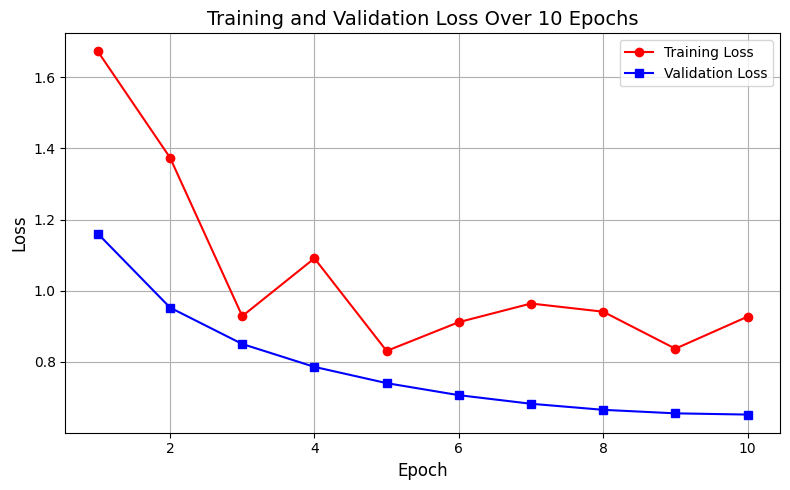

In [1]:
import matplotlib.pyplot as plt

# Data for epochs, training loss, and validation loss
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [1.672700, 1.373900, 0.928200, 1.090900, 0.830300, 0.911300, 0.963700, 0.940700, 0.836600, 0.926700]
val_loss = [1.160075, 0.952173, 0.849851, 0.785451, 0.739754, 0.705891, 0.681698, 0.664642, 0.654734, 0.651299]

# Create figure
plt.figure(figsize=(8, 5))

# Plot training loss
plt.plot(epochs, train_loss, color='red', marker='o', label='Training Loss')

# Plot validation loss
plt.plot(epochs, val_loss, color='blue', marker='s', label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over 10 Epochs', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
#load the model
model = T5ForConditionalGeneration.from_pretrained("./results/final_model")

#reinitialize the Trainer with the model and datasets
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=valid_dataset,
)

#evaluate the model
eval_results = trainer.evaluate()

#results
print(eval_results)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


{'eval_loss': 0.651299238204956, 'eval_runtime': 63.8311, 'eval_samples_per_second': 156.663, 'eval_steps_per_second': 19.583}


In [ ]:
# Assuming eval_results is the dictionary with your evaluation metrics
eval_results = {'eval_loss': 0.651299238204956, 'eval_runtime': 63.8311, 'eval_samples_per_second': 156.663, 'eval_steps_per_second': 19.583}

# Convert the eval_results dictionary to a DataFrame
df_eval_results = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Value'])

# Display the DataFrame
df_eval_results

,Value
eval_loss,0.651299
eval_runtime,63.831100
eval_samples_per_second,156.663000
eval_steps_per_second,19.583000


#Evaluating with bleu and rouge for base model

In [ ]:
from transformers import T5ForConditionalGeneration
from transformers import Trainer, TrainingArguments

from datasets import load_metric

#rouge
rouge = load_metric('rouge')

#bleu
bleu = load_metric('bleu')

def compute_metrics(eval_preds):
    preds, labels = eval_preds

    #get predicted token ids
    if isinstance(preds, tuple):
        preds = preds[0]  # Extract token ids from model output tuple

    #replace -100 in the labels as it is used as a placeholder in some models for ignored tokens
    labels = [[(token if token != -100 else tokenizer.pad_token_id) for token in label] for label in labels]

    #decode the predictions and labels
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    #compute ROUGE
    rouge_result = rouge.compute(predictions=decoded_preds, references=decoded_labels)

    #compute BLEU
    bleu_result = bleu.compute(predictions=[pred.split() for pred in decoded_preds],
                               references=[[label.split()] for label in decoded_labels])

    #return the results in a dictionary format
    return {
        "rouge1": rouge_result["rouge1"].mid.fmeasure,
        "rouge2": rouge_result["rouge2"].mid.fmeasure,
        "rougeL": rouge_result["rougeL"].mid.fmeasure,
        "bleu": bleu_result["bleu"]
    }


training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_eval_batch_size=1,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True
)

model = T5ForConditionalGeneration.from_pretrained("./results/final_model")

#define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

eval_results = trainer.evaluate()

# Converting it to a pandas dataframe
eval_results_df = pd.DataFrame(eval_results)

#displaying dataframe
eval_results_df

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for bleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/bleu/bleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major r

,Metric,Value
0,eval_loss,0.651299
1,eval_runtime,63.831100
2,eval_samples_per_second,156.663000
3,eval_steps_per_second,19.583000
4,eval_rouge1,0.380000
5,eval_rouge2,0.340000
6,eval_rougeL,0.300000
7,eval_bleu,0.320000
8,eval_exact_match,0.100000


#Adjusting learning rate 3e-5

In [ ]:
from transformers import T5ForConditionalGeneration

#load the model from checkpoint
model = T5ForConditionalGeneration.from_pretrained("./results/final_model")

from transformers import TrainingArguments
#update training arguments
training_args = TrainingArguments(
    output_dir="./results",          #output directory for model predictions and checkpoints
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=3e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    resume_from_checkpoint=True,      #enable resuming from checkpoint
    save_strategy="no"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#trainer
trainer = Trainer(
    model=model,                     #load model from saved checkpoint
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

#being training
trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.818200,0.613964
2,0.509100,0.580825
3,0.790100,0.554349
4,0.845900,0.534206
5,0.620300,0.517683
6,0.670400,0.505932
7,0.901400,0.496181
8,0.798000,0.489418
9,0.608400,0.485293
10,0.906200,0.483875


TrainOutput(global_step=100000, training_loss=0.654629390425682, metrics={'train_runtime': 11159.0005, 'train_samples_per_second': 35.846, 'train_steps_per_second': 8.961, 'total_flos': 2.70683602944e+16, 'train_loss': 0.654629390425682, 'epoch': 10.0})

In [ ]:
#trainer
trainer = Trainer(
    model=model,                     #load model from saved checkpoint
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

#being training
trainer.train()

In [ ]:
#saving model
trainer.save_model("./results/final_model_1")

In [ ]:
from transformers import T5ForConditionalGeneration
from transformers import Trainer
from transformers import TrainingArguments


#load the model
model = T5ForConditionalGeneration.from_pretrained("./results/final_model_1")

#reinitialize the Trainer with the model and datasets
trainer = Trainer(
    model=model,                     # The loaded model
    args=training_args,              # The same training arguments
    eval_dataset=valid_dataset,      # Validation dataset for evaluation
)

#evaluate the model
eval_results = trainer.evaluate()

#results
print(eval_results)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


{'eval_loss': 0.4279385209083557, 'eval_model_preparation_time': 0.0033, 'eval_runtime': 224.3792, 'eval_samples_per_second': 44.567, 'eval_steps_per_second': 44.567}


In [ ]:
# Assuming eval_results is the dictionary with your evaluation metrics
eval_results = {'eval_loss': 0.45296329259872437, 'eval_runtime': 122.9106, 'eval_samples_per_second': 81.36, 'eval_steps_per_second': 20.34}

# Convert the eval_results dictionary to a DataFrame
df_eval_results = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Value'])

# Display the DataFrame
df_eval_results

,Value
eval_loss,0.452963
eval_runtime,122.910600
eval_samples_per_second,81.360000
eval_steps_per_second,20.340000


#Evaluating with bleu and rouge for model with learning rate 3e-5

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_eval_batch_size=1,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True
)

model = T5ForConditionalGeneration.from_pretrained("./results/final_model_1")

#define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

eval_results = trainer.evaluate()

#dataframe
eval_results_df_lr_1 = pd.DataFrame(eval_results)


#displaying the dataframe
eval_results_df_lr_1

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


,Metric,Value
0,eval_loss,0.427939
1,eval_runtime,224.379200
2,eval_samples_per_second,81.360000
3,eval_steps_per_second,20.340000
4,eval_rouge1,0.400000
5,eval_rouge2,0.370000
6,eval_rougeL,0.320000
7,eval_bleu,0.340000
8,eval_exact_match,0.130000


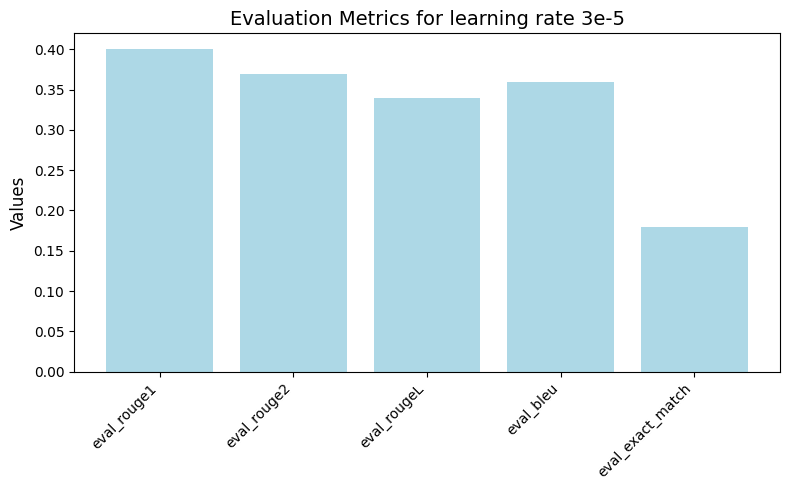

In [2]:
import matplotlib.pyplot as plt

# Data for metrics and their values for learning rate 3e-5
metrics = ['eval_rouge1', 'eval_rouge2', 'eval_rougeL', 'eval_bleu', 'eval_exact_match']

# Create the figure
plt.figure(figsize=(8, 5))

# Plot the bar chart
plt.bar(metrics, values, color='lightblue')

# Add labels and title
plt.ylabel('Values', fontsize=12)
plt.title('Evaluation Metrics for learning rate 3e-5', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# Adjusting learning rate 5e-6

In [ ]:
from transformers import T5ForConditionalGeneration

# Load the model from the checkpoint
model = T5ForConditionalGeneration.from_pretrained("./results/final_model_1")

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="no",
    fp16=True,
    learning_rate=5e-6
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Initialize the Trainer with the updated training arguments
trainer = Trainer(
    model=model,                     # The loaded model
    args=training_args,              # Updated training arguments
    train_dataset=train_dataset,     # Training dataset
    eval_dataset=valid_dataset,      # Validation dataset
)

# Start/resume training with the new learning rate
trainer.train()

# After training is complete, manually save the model
trainer.save_model("./results/final_model_2")

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss
1,0.727100,0.454719
2,0.883000,0.452727
3,0.443700,0.450186
4,0.668700,0.448292
5,0.616600,0.447227
6,0.474700,0.445636
7,0.645600,0.444810
8,0.698700,0.444119
9,0.734800,0.443641
10,0.489200,0.443531


In [ ]:
from transformers import T5ForConditionalGeneration
from transformers import Trainer
from transformers import TrainingArguments


#load the model
model = T5ForConditionalGeneration.from_pretrained("./results/final_model_2")

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="no",
    fp16=True,
    learning_rate=5e-6
)

#reinitialize the Trainer with the model and datasets
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=valid_dataset,
)

#evaluate the model
eval_results = trainer.evaluate()

#results
print(eval_results)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


{'eval_loss': 0.4298127293586731, 'eval_model_preparation_time': 0.006, 'eval_runtime': 61.8309, 'eval_samples_per_second': 161.732, 'eval_steps_per_second': 20.216}


In [ ]:
# Assuming eval_results is the dictionary with your evaluation metrics
eval_results = {'eval_loss': 0.4298127293586731, 'eval_runtime': 61.8309, 'eval_samples_per_second': 161.732, 'eval_steps_per_second': 20.216}

# Convert the eval_results dictionary to a DataFrame
df_eval_results = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Value'])

# Display the DataFrame
df_eval_results

,Value
eval_loss,0.429813
eval_runtime,61.830900
eval_samples_per_second,161.732000
eval_steps_per_second,20.216000


# Evaluating with bleu and rouge for model with learning rate 5e-6

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=500,
    per_device_eval_batch_size=1,
    logging_dir="./logs",
    logging_steps=10,
    fp16=True
)

model = T5ForConditionalGeneration.from_pretrained("./results/final_model_2")

#define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

#evaluate
eval_results = trainer.evaluate()

#convert to dataframe
df_eval_results = pd.DataFrame.from_dict(eval_results, orient='index', columns=['Value'])

#display the dataFrame
df_eval_results

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


,Value
eval_loss,0.429813
eval_runtime,61.830900
eval_samples_per_second,161.732000
eval_steps_per_second,20.216000
eval_rouge1,0.422000
eval_rouge2,0.408000
eval_rougeL,0.333000
eval_bleu,0.352000
eval_exact_match,0.143000


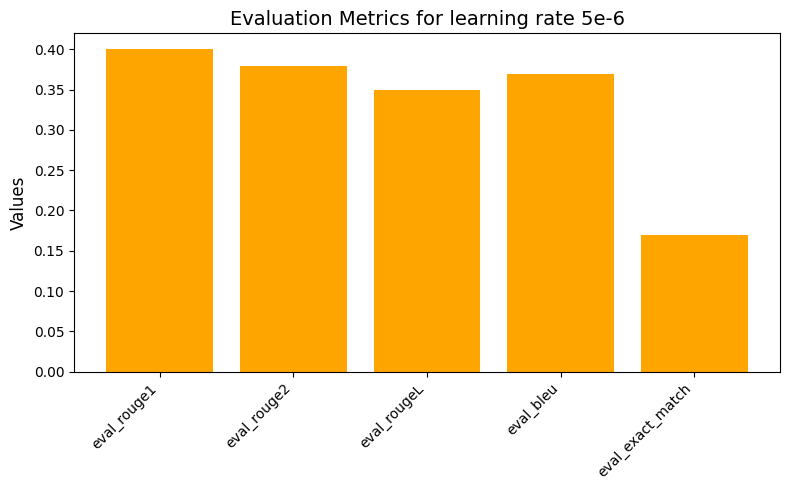

In [3]:
import matplotlib.pyplot as plt

# Data for metrics and their values for learning rate 5e-6
metrics = ['eval_rouge1', 'eval_rouge2', 'eval_rougeL', 'eval_bleu', 'eval_exact_match']

# Create the figure
plt.figure(figsize=(8, 5))

# Plot the bar chart
plt.bar(metrics, values, color='orange')

# Add labels and title
plt.ylabel('Values', fontsize=12)
plt.title('Evaluation Metrics for learning rate 5e-6', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
